# Azure AI Face API for detecting faces

Based on seconf part of [this MS Learn manual](https://microsoftlearning.github.io/mslearn-ai-vision/Instructions/Exercises/04-face-service.html).

In [ ]:
%pip install azure-ai-vision-face==1.0.0b2

In [1]:
from dotenv import load_dotenv
import os
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

from azure.ai.vision.face import FaceClient
from azure.ai.vision.face.models import FaceDetectionModel, FaceRecognitionModel, FaceAttributeTypeDetection03
from azure.core.credentials import AzureKeyCredential

# Get Configuration Settings
load_dotenv()
cog_endpoint = os.getenv('AI_SERVICE_ENDPOINT')
cog_key = os.getenv('AI_SERVICE_KEY')
print(f'Endpoint: {cog_endpoint}')

Endpoint: https://face-api-service537.cognitiveservices.azure.com/


In [9]:
# specify input image for analysis and output image for save results
image_file = os.path.join (os.getcwd(), "data", "test-images", "people.jpg")
output_file = os.path.join (os.getcwd(), "data", "output", "detected_faces.jpg")
print('Detecting faces in', image_file)

Detecting faces in c:\DY\Programming\Azure-AI\Azure-AI\data\test-images\people.jpg


In [7]:
# Authenticate Face client and specify facial features to be retrieved
face_client = FaceClient(endpoint=cog_endpoint, credential=AzureKeyCredential(cog_key))
features = [FaceAttributeTypeDetection03.HEAD_POSE,
            FaceAttributeTypeDetection03.BLUR,
            FaceAttributeTypeDetection03.MASK]

2 faces detected.

Face number 1
 - Head Pose (Yaw): -8.1
 - Head Pose (Pitch): -13.2
 - Head Pose (Roll): -4.3
 - Blur: BlurLevel.LOW
 - Mask: MaskType.NO_MASK

Face number 2
 - Head Pose (Yaw): 3.3
 - Head Pose (Pitch): -18.0
 - Head Pose (Roll): -9.2
 - Blur: BlurLevel.MEDIUM
 - Mask: MaskType.NO_MASK

Results saved in c:\DY\Programming\Azure-AI\Azure-AI\data\output\detected_faces.jpg


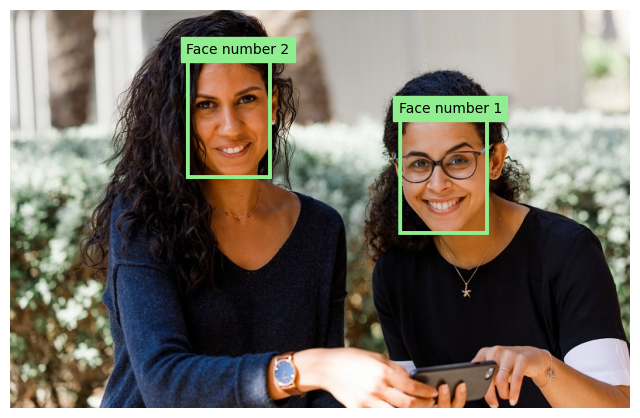

In [10]:
# Use the Face client to detect faces in the image
with open(image_file, mode="rb") as image_data:
    detected_faces = face_client.detect(
        image_content=image_data.read(),
        detection_model=FaceDetectionModel.DETECTION03,
        recognition_model=FaceRecognitionModel.RECOGNITION04,
        return_face_id=False,
        return_face_attributes=features,
    )

    if len(detected_faces) > 0:
        print(len(detected_faces), 'faces detected.')

        # Prepare image for drawing
        fig = plt.figure(figsize=(8, 6))
        plt.axis('off')
        image = Image.open(image_file)
        draw = ImageDraw.Draw(image)
        color = 'lightgreen'
        face_count = 0

        # Draw and annotate each face
        for face in detected_faces:

            # Get face properties
            face_count += 1
            print('\nFace number {}'.format(face_count))

            print(' - Head Pose (Yaw): {}'.format(face.face_attributes.head_pose.yaw))
            print(' - Head Pose (Pitch): {}'.format(face.face_attributes.head_pose.pitch))
            print(' - Head Pose (Roll): {}'.format(face.face_attributes.head_pose.roll))
            print(' - Blur: {}'.format(face.face_attributes.blur.blur_level))
            print(' - Mask: {}'.format(face.face_attributes.mask.type))

            # Draw and annotate face
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(image)
            draw.rectangle(bounding_box, outline=color, width=5)
            annotation = 'Face number {}'.format(face_count)
            plt.annotate(annotation,(r.left, r.top), backgroundcolor=color)

        # Save annotated image
        plt.imshow(image)
        fig.savefig(output_file)
        print('\nResults saved in', output_file)
    else:
        print('No faces detected.')